# <font color=Magenta>RECON</font>N<font color=#990000>ECT</font> project - ae<font color=Magenta>R</font>osol n<font color=Magenta>E</font>w parti<font color=Magenta>C</font>le f<font color=Magenta>O</font>rmatio<font color=Magenta>N</font> aNd s<font color=#990000>E</font>a i<font color=#990000>C</font>e mel<font color=#990000>T</font>

*Report for the course “eScience Tools in Climate Science: Linking Observations with Modelling”*

**Student:** *Kei Tsuruhara, Stockholm University [kei2.8848@gmail.com]*

**Date:** *18.11.2022*

**Assistant:** *Dominic Heslin-Rees [Dominic.Heslin-Rees@aces.su.se] (Group 3)*

## Abstract

New particle formation (NPF) events contribute to cloud condensation nuclei (CCN) globally. In the Arctic, particularly, NPF may be more important, given that cloud properties are sensitive to changes in NPF. NPF events are thought to be affected by sea ice decline. This is because less sea ice means more open ocean, therefore allowing solar radiation to interact with biological organisms. However, how and how much sea ice decline affects NPF events remains unclear. In this study, I use sea ice and chlorophyll concentration data from both satellite observations and a CMIP6 model. Chlorophyll concentration is used as a proxy for phytoplankton in order to see the relationship between sea ice and biological activities. The trends in sea ice loss and chlorophyll concentration were analyzed and compared to each other. Also, I looked into model data to see if it represents those trends seen in observations. As a result, a clear relationship was not seen between these two in the observations. There are some marine areas where sea ice did not exist but chlorophyll increased greatly, so something other than sea ice decline might play a role here. In model data, the trend in sea ice decline betweeen them was not represented correctly. Further analyses with other variables and observations could be helpful to understand this discrepancy.

## Table of Contents
1. [Introduction](#intro)
1. [Methods](#methods)
    1. [Packages](#packages)
    1. [Datasets](#dataset)
    1. [Analysis methods](#methodology)
1. [Results](#results)
    1. [Current state](#current)
    1. [Trend analysis (observations)](#trend_obs)
    1. [Trend analysis (model)](#trend_mod)
1. [Discussion and Conclusion](#conclusion)
1. [Acknowledgements](#acknowledge)
1. [References](#references)

## 1. Introduction <a name="intro"></a>

Secondary aerosol particles can form in the atmosphere via a process known as new particle formation (NPF). It is estimated that about 45% of global cloud condensation nuclei (CCN) in the low-level clouds are derived from NPF ([Merikanto et al., 2009](#ref1)). Particles formed via NPF events grow to become CCN, and this process is particularly important in the Arctic, where the background aerosol number concentration is very low, and cloud properties are more sensitive to changes induced by NPF. 

Recent observations (e.g., [England et al., 2021](#ref2)) have shown stronger warming in the Arctic than the global average, a phenomenon known as Arctic amplification. The amplified warming is causing rapid sea ice decline in the Arctic ([Serreze & Barry, 2011](#ref3)), and this rapid trend is thought to affect aerosol particles in the Arctic ([Schmale & Baccarini, 2021](#ref4)). A study, for example, shows a striking correlation (r = −0.75) between monthly sea ice extent within the Barents and Greenland seas and nucleation events ([Dall ́Osto et al., 2017](#ref5)). Other modeling studies have predicted that an increase in biological activity during summer, when temperature increases and sea ice decreases, leads to higher production and emissions of dimethylsulphide (DMS) from the sea surface (e.g., [Galí et al., 2019](#ref6)). As a result, it is assumed that more frequent NPF events occur in the Arctic due to sea ice decline. However, the changing climate in the Arctic might also affect other things such as sea surface temperature and thus biological activity, cloud cover, and wind direction. Thus, the correlation between sea ice decline and the frequency of NPF events might not be a causal relationship. It is essential to evaluate to what extent declining sea ice is actually contributing to elevated NPF events in the Arctic and if other factors also play a role. 

In the course, we worked in a group and studied how much NPF frequency is affected by biological activity in neighboring marine areas and if the regions unaffected by sea ice decline affect NPF events. I use satellite data and CMIP6 model data.

#### Research questions:
1. *Do we see an increase in biological activity and NPF events in observations and models?* 
1. *How is NPF frequency affected by increased biological activity in neighboring marine areas?*
1. *What is the effect of regions unaffected by sea ice decline on NPF?* 

## 2. Methods <a name="methods"></a>

### 2.A. Packages <a name="packages"></a>


In [1]:
import xarray as xr
import urllib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.ticker as ticker
import pandas as pd
from scipy.stats import linregress
import warnings
from shapely.errors import ShapelyDeprecationWarning
from pandas.errors import PerformanceWarning 
import scipy
from scipy import stats
import kei_functions as func
import numpy.polynomial.polynomial as P
import scipy.optimize as optimize
import sklearn.metrics as metrics

In [2]:
import gcsfs
import requests
import intake

In [3]:
%load_ext autoreload
%autoreload 2

### 2.B. Datasets <a name="dataset"></a>
#### OSI-SAF satellite data
Satellite sea ice concentration data (resolution: 25km) from Ocean and Sea Ice Satellite Application Facility (OSI-SAF) are used. The time period of the data is from 2000 to 2017. I combined daily data for each year and downloaded it.

#### ESACCI-OC satellite data
I use monthly chlorophyll-A concentration data (resolution: 0.25 deg) from ESA CCI ocean colour chlorophyll (ESACCI-OC). Only summertime data in the period between 2000 and 2017 are used. I use this satellite chlorophyll-A data as a proxy for phytoplankton.

#### MPI-ESM1-2-HR
I use the higher-resolution Max Planck Institute Earth System Model (MPI-ESM1-2-HR). ESMs are comprehensive climate models and they are used to estimate the regional and global climate state ([Heavens et al., 2013](#ref7)). MPI-ESM1-2 is one of ESMs and contributes to Coupled Model Intercomparison Project – phase 6 (CMIP6). Here I used the model to see if it represents the trend in sea ice and chlorophyll concentrations in the Arctic that were seen in observations. I used the monthly data for the period from 2000 to 2014.

<!-- #### NPF frequency measured at Zeppelin station -->

### 2.C. Analysis methods <a name="methodology"></a>

#### Current state 
The latest state of sea ice and chlorophyll concentrations are shown for both the observation and the model.

#### Trend analysis (observations) 
To see trend in sea ice and chlorophyll concentrations, I conducted trend analysis. Our group analyzed observational data from the Zeppelin station, so I focused on neighboring marine areas: the Greenland Sea (Latitude: from 60°N to 90°N, Longitude: from -40°E to 20°E) and the Barents Sea (Latitude: from 60°N to 90°N, Longitude: from 10°E to 50°E). To see the sea ice trend, the slopes of sea ice and chlorophyll concentrations were calculated using Theil Sen Slope, which is a robust method of linear regression, and were plotted on maps. Then, using the results of values of slopes, I plotted and compared the regression lines between the areas where the change in sea ice concentration is below 0 % in the study period (area B) and above or equal to 0 % (area A). 

#### Trend analysis (model)
I again conducted trend analyses to see if the model represents the sea ice and chlorophyll trends. Then I compared the observations and the model, considering that the period in the model (2000-2014) is shorter than that of the observations (2000-2017).

## 3. Results <a name="results"></a>

### 3.A. Current state <a name="current"></a>

#### Sea ice (observation)

In [4]:
# Opening 2017 data
ice_ds_2017 = xr.open_dataset(f'data/sea_ice_conc/ice_conc_2017.nc')

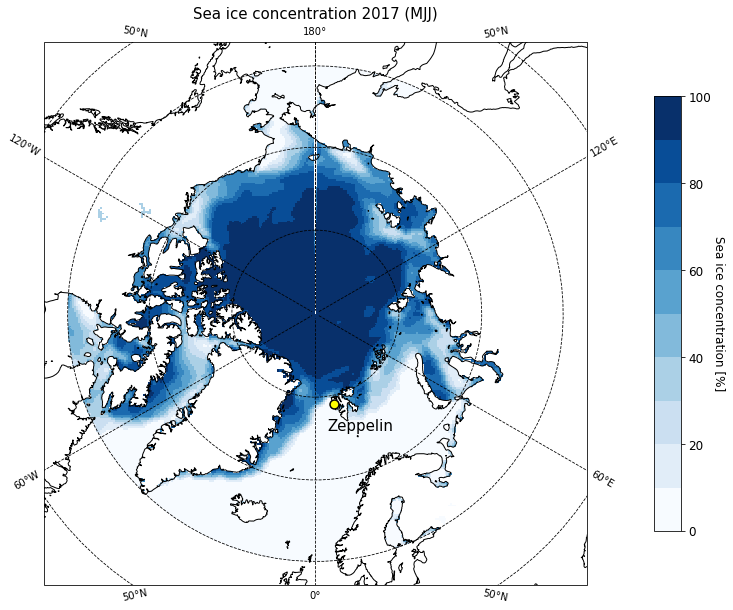

In [5]:
# Average observational sea ice concentration in summer (MJJ) 2017 
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    func.ice_one_year(months=[5,6,7], year=2017, title='Sea ice concentration 2017 (MJJ)', figname='ice_2017_mjj')

<b> Figure 1: </b> Averaged observational sea ice concentration [%] in the Arctic in summer 2017. The yellow dot shows the location of Zeppelin Station.

#### Sea ice (model)

In [6]:
# Opening ESM datastore
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [7]:
# Search MPI-ESM1-2-HR by activity_id, experiment_id, variable_id, and source_id
df_subset = col.df.query("activity_id=='CMIP' & experiment_id=='historical' & variable_id=='siconc' & source_id=='MPI-ESM1-2-HR'")

In [9]:
# Choose the dataset to use (r5i1p1f1)
zstore = df_subset.zstore.values[-1]
mapper = fs.get_mapper(zstore)

# open using xarray
ds = xr.open_zarr(mapper, consolidated=True)

In [10]:
# Convert coordinates from 0-360 degrees to -180 to 180 degrees
ds_assigned_coords = ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180))

In [11]:
# Rename coordinates
ds_assigned_coords = ds_assigned_coords.rename({"longitude": "lon", "latitude": "lat"})

/Users/kei/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/kei/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/kei/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/Users/kei/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py

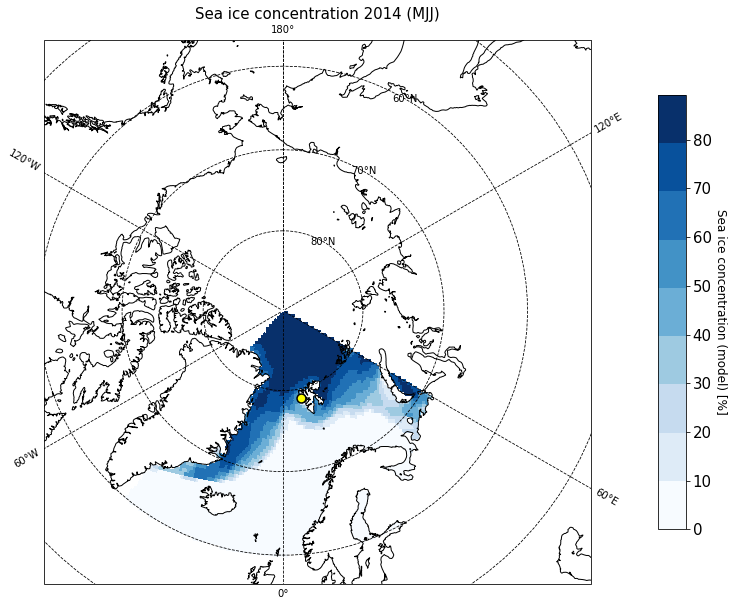

In [12]:
# Average modeled sea ice concentration in summer (MJJ) 2015
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.ice_model_one_year(ds=ds_assigned_coords, months=[5,6,7], year=2014, title='Sea ice concentration 2014 (MJJ)', figname='model_ice_2014_mjj')

<b> Figure 2: </b> Averaged MPI-ESM sea ice concentration [%] in summer (May, Jun, and July) 2017. Only the area with latitude above 60°N, Longitude between 20°E and 60°E are shown. Zeppelin station is marked by the yellow dot.

#### Chlorophyll (observation)

In [13]:
# Get URLs and open a dataset
with open("URLs.txt", "r") as f:
    lines = [line.rstrip('\n') for line in f]
urls = [x for x in lines if 'OBS-ESACCI-OC' in x]
xr_chloro = func.get_xr_from_url(urls[0],None)

In [14]:
# Convert coordinates from 0-360 degrees to -180 to 180 degrees
xr_chloro_assigned_coords = xr_chloro.assign_coords(lon=(((xr_chloro.lon + 180) % 360) - 180)).sortby('lon')

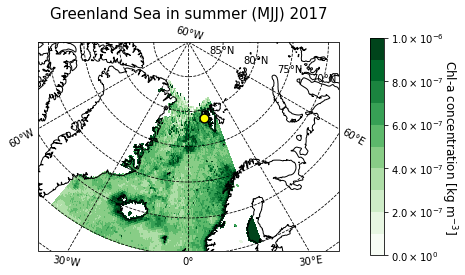

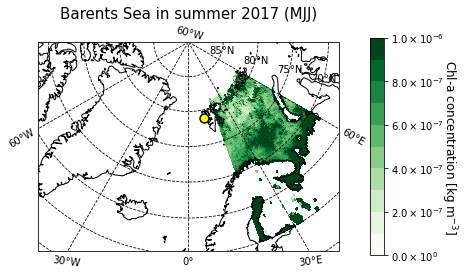

In [15]:
# Greenland Sea summer 2017
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.chl_one_year(xr_chloro_assigned_coords, lon_min=-40, lon_max=20, lat_min=60, lat_max=90, title='(a) Greenland Sea in summer (MJJ) 2017', months=[5,6,7], year=2017, figname='greenland_west_2017.png')
    
# Barents Sea summer 2017 
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.chl_one_year(xr_chloro_assigned_coords, lon_min=20, lon_max=60, lat_min=60, lat_max=90, title='(b) Barents Sea in summer 2017 (MJJ)', months=[5,6,7], year=2017, figname='barents_2017.png')


<b> Figure 3: </b> Averaged observational chlorophyll concentration [kg m$^{-3}$] in summer (May, Jun, and July) 2017 in the Greenland Sea (above) and the Barents Sea (below). Zeppelin station is marked by the yellow dot.

#### Chlorophyll (model)

In [16]:
# Opening ESM datastore
df_subset_chl = col.df.query("activity_id=='CMIP' & experiment_id=='historical' & variable_id=='chl' & source_id=='MPI-ESM1-2-HR'")

In [17]:
# Choose the dataset to use (r6i1p1f1)
zstore = df_subset_chl.zstore.values[-1]
mapper = fs.get_mapper(zstore)

# open using xarray
ds_chl = xr.open_zarr(mapper, consolidated=True)

In [18]:
# Convert coordinates from 0-360 degrees to -180 to 180 degrees
ds_assigned_coords_chl = ds_chl.assign_coords(longitude=(((ds_chl.longitude + 180) % 360) - 180))

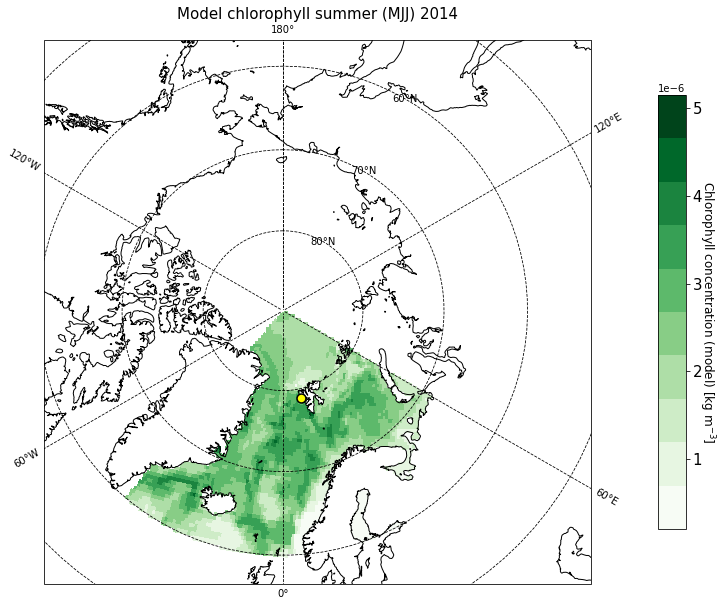

In [19]:
# Greenland Sea and barents Sea summer 2017
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings('ignore', category=PerformanceWarning)
    func.chl_model_one_year(ds_assigned_coords_chl, year=2014, months=[5,6,7], title='Model chlorophyll summer (MJJ) 2014', figname='model_chl_2014')

<b> Figure 4: </b> Averaged modeled chlorophyll concentration [kg m$^{-3}$] in summer (May, June, and July) 2017 in the Greenland Sea (above) and the Barents Sea (below). Zeppelin station is marked by the yellow dot.

Figure 1 shows the latest summertime sea ice concentration in the observations. We can see high concentrations in the north of Zeppelin station and lower concentrations in the south. Figure 2 shows a similar distribution of sea ice concentration in the model. Figure 3 shows the latest summertime chlorophyll concentration in the observation. We can see a relatively low and homogeneous distribution in the Greenland Sea, whereas a higher and more heterogeneous distribution in the Barents Sea than the Greenland Sea. On the other hand, we can not see the same distribution in the model (figure 4).

### 3.B. Trend analysis (observations) <a name="trend_obs"></a>

#### Sea ice

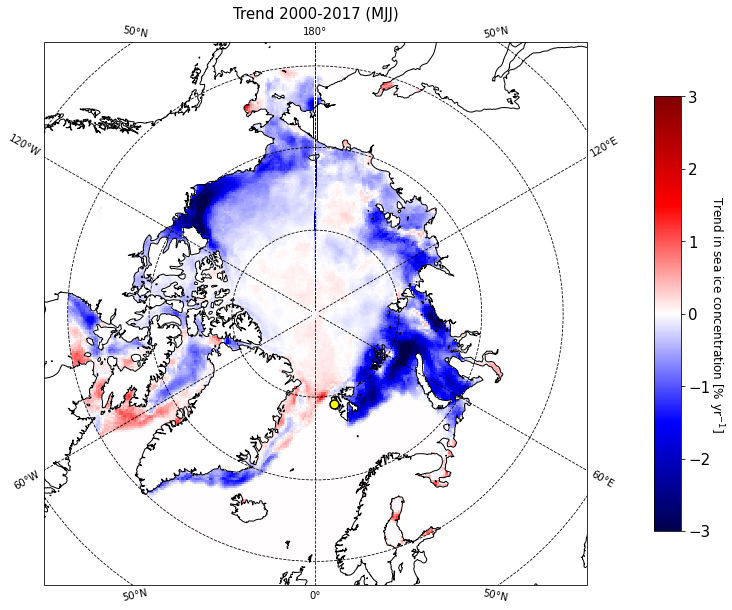

In [20]:
# Summer 2000-2017
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    func.ice_trend(months=[5,6,7], years=[2000,2017], title='Trend 2000-2017 (MJJ)', figname='ice_2000_2017_mjj')

<b> Figure 5: </b> Spatial absolute trend in observational sea ice concentration [% yr$^{-1}$] in summer (May, Jun, and July) 2000-2017. Zeppelin station is marked by the yellow dot.

#### Chlorophyll

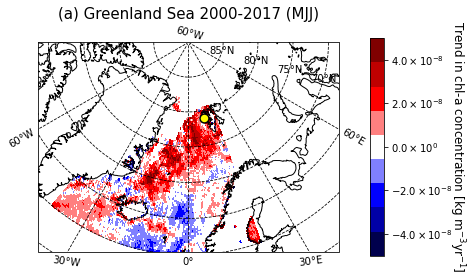

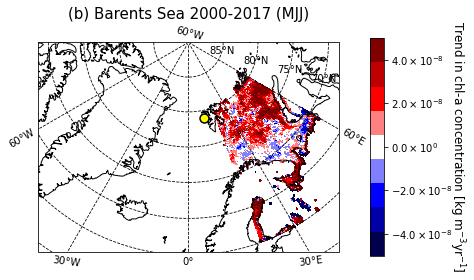

In [21]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    
# Greenland Sea summer absolute trend
    func.absolute_trend(xr_chloro_assigned_coords, lon_min=-40, lon_max=20, lat_min=60, lat_max=90, title='(a) Greenland Sea 2000-2017 (MJJ)', years=[2000,2017], months=[5,6,7], figname='absolute_greenland_2000_2017.png')
    
# Barents Sea summer absolute trend
    func.absolute_trend(xr_chloro_assigned_coords, lon_min=20, lon_max=60, lat_min=60, lat_max=90, title='(b) Barents Sea 2000-2017 (MJJ)', years=[2000,2017], months=[5,6,7], figname='absolute_barents_2000_2017.png')

<b> Figure 6: </b> Spatial absolute trend in observational chlorophyll concentration [kg m$^{-3}$ yr$^{-1}$] in summer (May, June, and July) 2000-2017 in (a) the Greenland Sea and (b) the Barents Sea. Zeppelin station is marked by the yellow dot.

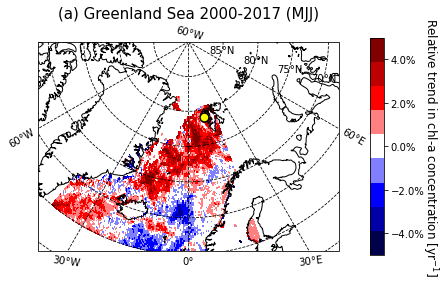

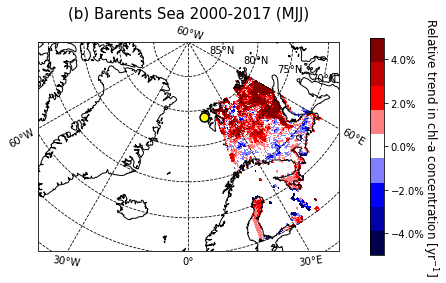

In [22]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    
# Greenland Sea summer relative trend
    func.relative_trend(xr_chloro_assigned_coords, lon_min=-40, lon_max=20, lat_min=60, lat_max=90, title='(a) Greenland Sea 2000-2017 (MJJ)', years=[2000,2017], months=[5,6,7], figname='relative_greenland_2000_2017.png')
    
# Barents Sea summer relative trend
    func.relative_trend(xr_chloro_assigned_coords, lon_min=20, lon_max=60, lat_min=60, lat_max=90, title='(b) Barents Sea 2000-2017 (MJJ)', years=[2000,2017], months=[5,6,7], figname='relative_barents_2000_2017.png')

<b> Figure 7: </b> Spatial relative trend in observational chlorophyll concentration [% yr$^{-1}$] in summer (May, June, and July) 2000-2017 in (a) the Greenland Sea and (b) the Barents Sea. Zeppelin station is marked by the yellow dot.

#### Yearly trend

To see the average trend in chlorophyll concentration in the two seas, I took average over the two areas and plotted in a time series (figures 8 and 9).

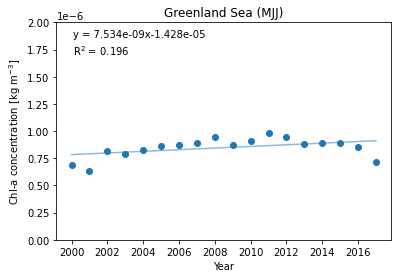

In [23]:
# Greenland Sea summer time series 2000-2017
func.plot_chl_time_series(xr_chloro_assigned_coords, lon_min=-40, lon_max=20, lat_min=60, lat_max=90, months=[5,6,7], years=[2000,2017], ylim=[0, 2*10**(-6)], title='Greenland Sea (MJJ)', figname='average_trend_green')

<b> Figure 8: </b> Yearly trend in the monthly summer (MJJ) averages for chlorophyll concentration in the Greenland Sea.

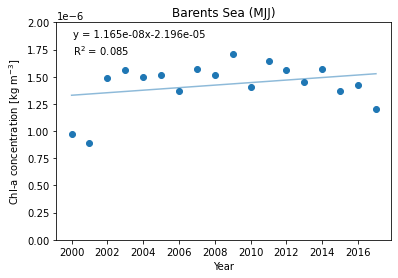

In [24]:
# Barents Sea summer time series 2000-2017
func.plot_chl_time_series(xr_chloro_assigned_coords, lon_min=20, lon_max=60, lat_min=60, lat_max=90, months=[5,6,7], years=[2000,2017], ylim=[0, 2*10**(-6)], title='Barents Sea (MJJ)', figname='average_trend_barents')

<b> Figure 9: </b> Yearly trend in the monthly summer (MJJ) averages for chlorophyll concentration in the Barents Sea.

#### Comparison between area A and area B

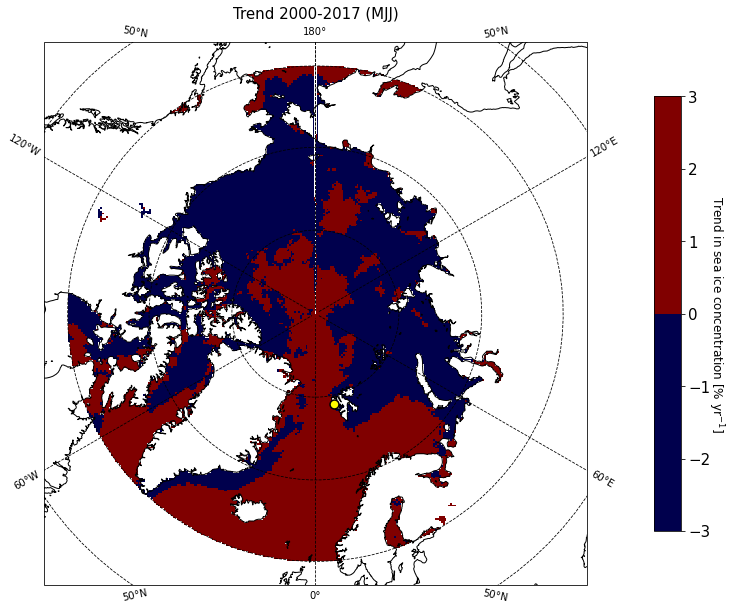

In [25]:
# area A and B
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    func.ice_trend_0(months=[5,6,7], years=[2000,2017], title='Trend 2000-2017 (MJJ)', figname='ice_above_below_0_2000_2017_mjj')

<b> Figure 10: </b>Spatial absolute trend in sea ice showing two areas where the change is below 0% (area B, blue) and the change is above or equal to 0% (area A, red). Zeppelin station is marked by the yellow dot.

In [26]:
# Get the sea ice trend in 432*432 grid cells for the years from 2000 to 2017 and the months from May to July
slope_2d = func.ice_slope_2d_432(months=[5,6,7], years=[2000,2017])

In [27]:
# Get lat and lon of each grid cell of area A and area B separetely
decline_coords = func.get_coords_from_trend(slope_2d=slope_2d, threshold=0)

In [28]:
# Create a df list for the chlorophyll trend in area A and area B in the Barents Sea
df_list_barents = func.xr_to_trend_df(xr_chl=xr_chloro_assigned_coords, lon_min=20, lon_max=60, lat_min=60, lat_max=90, months=[5,6,7], years=[2000,2017], decline_coords=decline_coords)

In [31]:
# Create a df list for the chlorophyll trend in area A and area B in the Greenland Sea
df_list_greenland = func.xr_to_trend_df(xr_chl=xr_chloro_assigned_coords, lon_min=-40, lon_max=20, lat_min=60, lat_max=90, months=[5,6,7], years=[2000,2017], decline_coords=decline_coords)

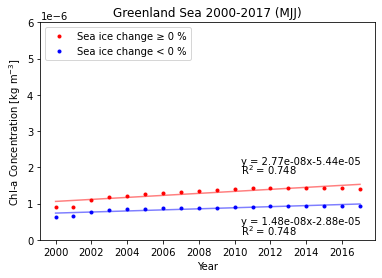

In [32]:
# # Trend in chlorophyll concentration in the Greenland Sea
func.df_to_plot(df_above=df_list_greenland[1], df_below=df_list_greenland[0], confidence=0.95, title='Greenland Sea 2000-2017 (MJJ)', 
                label_below='Sea ice change < 0 %', label_above='Sea ice change ≥ 0 %', figname='average_chl_trend_green', xy1=[0.6, 0.35], xy2=[0.6, 0.07])

<b> Figure 11: </b> Chlorophyll trend comparison between area A (sea ice change ≥ 0%) and area B (sea ice change < 0%) in the Greenland Sea.

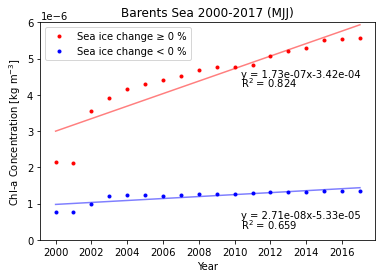

In [33]:
# Trend in chlorophyll concentration in the Barents Sea
func.df_to_plot(df_above=df_list_barents[1], df_below=df_list_barents[0], confidence=0.95, title='Barents Sea 2000-2017 (MJJ)', 
                label_below='Sea ice change < 0 %', label_above='Sea ice change ≥ 0 %', figname='average_chl_trend_barents', xy1=[0.6, 0.75], xy2=[0.6, 0.1])

<b> Figure 12: </b> Chlorophyll trend comparison between area A and area B in the Barents Sea.

Figure 5 shows the spatial trend in sea ice concentration between 2000 and 2017. We can see a strong decreasing trend in the Barents Sea to the east of Zeppelin, a slight increase between Greenland and Svalbard, and a decreasing trend on the east coast of Greenland. Figures 6 and 7 show the absolute spatial trend (figure 6) and the relative trend (figure 7) in chlorophyll concentration. Both show mixed trends in the Greenland Sea and the Barents Sea, but the further north, the more increasing trend we can see around Zeppelin. Figures 8 and 9 show the yearly trend in average chlorophyll concentration in the Greenland Sea and the Barents Sea. In both seas, we see a slight increase over time. Figure 10 shows the spatial trend in sea ice in two colors, which show area B and  A. Figures 11 and 12 show the comparison of the trend between area A (sea ice change ≥ 0%) and area B (sea ice change < 0%). In these plots, we see steeper slopes in area A rather than area B, which may indicate that sea ice decline doesn't increase chlorophyll concentration at the location. Moreover, compared to the Greenland Sea (2.77e-08, 1.48e-08), the Barents Sea (1.73e-07, 2.71e-08) shows steeper slopes, which means chlorophyll concentration is increasing more rapidly in the Barents Sea.

### 3.C. Trend analysis (model) <a name="trend_mod"></a>

#### Sea ice

/Users/kei/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


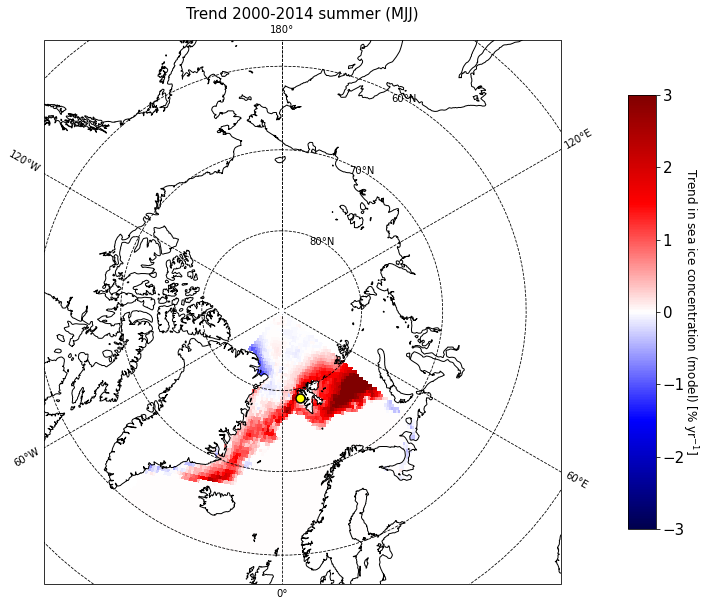

In [34]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings('ignore', category=PerformanceWarning)
    func.ice_model_trend(ds=ds_assigned_coords, years=[2000, 2014], months=[5,6,7], title='Trend 2000-2014 summer (MJJ)', figname='model_ice_2000_2014_mjj')

<b> Figure 13: </b> Spatial absolute trend in modeled sea ice concentration [% yr$^{-1}$] in summer (May, June, and July) 2000-2014.

/Users/kei/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


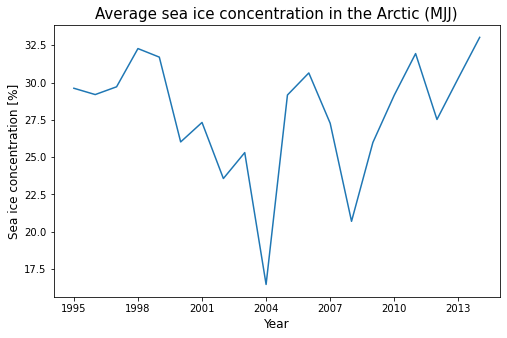

In [35]:
func.ice_trend_yearly(ds=ds_assigned_coords, months=[5,6,7], years=[1995, 2014], lat_min=60, lat_max=90, lon_min=-40, lon_max=60)

<b> Figure 14: </b> Yearly trend in modeled sea ice concentration [%] in the last 20 years

#### Chlorophyll

/Users/kei/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/Users/kei/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array

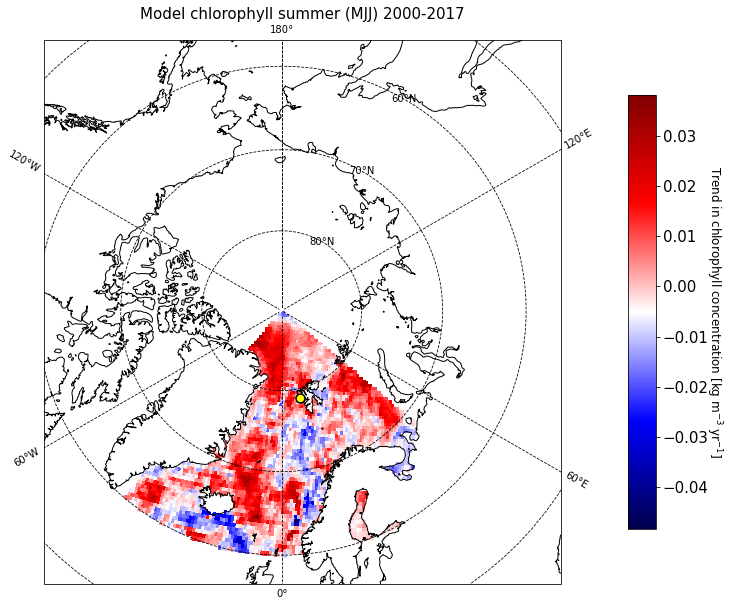

In [36]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)
    func.chl_model_trend(ds_assigned_coords_chl, years=[2000, 2014], months=[5,6,7], title='Model chlorophyll summer (MJJ) 2000-2017', figname='model_chl_2000_2014')

<b> Figure 15: </b> Spatial absolute trend in modeled chlorophyll concentration [kg m$^{-3}$ yr$^{-1}$] in summer (May, June, and July) 2000-2014.

/Users/kei/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/Users/kei/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array

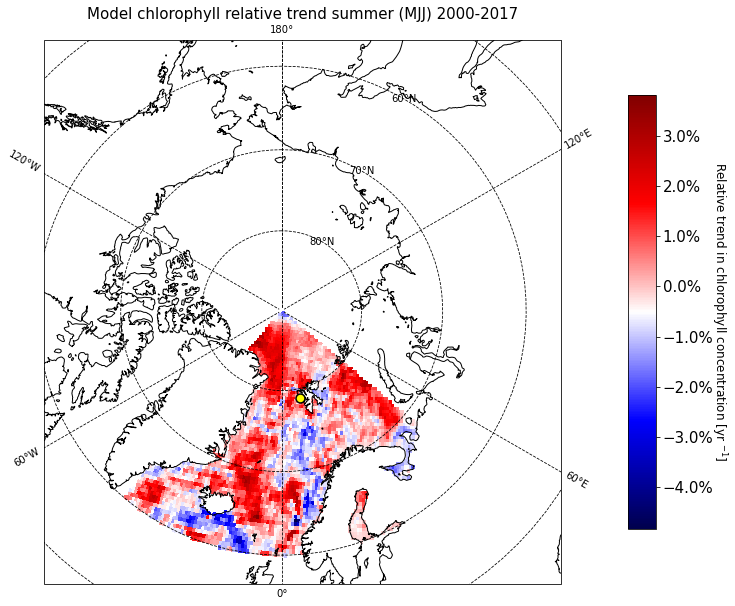

In [37]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings('ignore', category=PerformanceWarning)
    func.chl_model_relative_trend(ds=ds_assigned_coords_chl, years=[2000,2014], months=[5,6,7], title='Model chlorophyll relative trend summer (MJJ) 2000-2017', figname='model_chl_relative_2000_2014')

<b> Figure 16: </b> Spatial relative trend in modeled chlorophyll concentration [yr$^{-1}$] in summer (May, June, and July) 2000-2014.

<!-- ### 3.E. Sea ice trend vs NPF trend -->

Figure 13 shows a spatial trend in modeled sea ice concentration from 2000 to 2014. We can see a trend completely opposite to that in the observation (figure 5). We can see increasing trends in both the Greenland Sea and the Barents Sea, where we saw decreasing trends in the observation. Figure 14 shows the trend in modeled sea ice concentration in the last 20 years. We can see an remarkable decline in 2004 and an increase after that. Figures 15 and 16 show absolute and relative trends in modeled chlorophyll concentration. We can see a mixed trend in both plots, which is quite similar to that in the observation (figures 6 and 7). For example, both the model and observation show a decreasing trend in the south of Iceland. Also, the magnitude of the trend is quite similar to each other.

## 4. Discussion and Conclusion <a name="conclusion"></a> <a name="discussion"></a>

In the satellite and the model data, we saw an increase in chlorophyll concentrations, especially in the marine area around Zeppelin, despite a decrease in some other areas. However, we did not see any clear differences in the areas where sea ice decline was pronounced. In comparison to area B, area A showed larger slopes in both seas. This result implies that the decrease in sea ice concentration in the summer did not increase chlorophyll concentration at the location. In addition, we saw some areas (the Greenland Sea, for example) where sea ice does not exist, but chlorophyll concentration increased. That might imply that something other than sea ice decline plays a role here. However, that does not necessarily mean that sea ice decline has nothing to do with chlorophyll concentration or the activity of phytoplankton because it might affect areas downwind. Thus, if we were to use airmass back trajectories, we would be able to explore the impact that sea ice and phytoplankton have on observations of NPF. Also, as mentioned in 3.B, the slope of the increasing chlorophyll concentration in the Barents Sea seemed steeper than that in the Greenland Sea. This difference might be related the great decline of sea ice in the Barents Sea (figure 5). 
The model I used here failed to represent the sea ice loss in the summer from 2000 to 2014, whereas the chlorophyll trend was similar to what we saw in observational data both in the distribution and the magnitude. The reason why modeled sea ice trend seems very different from that in observational data is unclear, but sea ice transport to the south or a freshening of the Arctic Ocean might explain some of the increase seen in the modeled data. Also, it would be interesting to compare the data with other variables or other models.

## 5. Acknowledgements <a name="acknowledge"></a>

I would like to thank the rest of group 3 (Lovisa and our assistant Dominic) for always being active and positive in the discussion and for helping me all the time with the report. Thank you to Theodore for trying to help our group with handling and processing the data correctly. Thank you to Ada for providing helpful information on processing and visualizing the data correctly. Thank you to Paul and Michael for organizing this fantastic course. Thank you to all the other students and assistants for making my two weeks at Tjärnö extremely fun. 

## 6. References <a name="references"></a>

1. Merikanto, J., Spracklen, D. V., Mann, G. W., Pickering, S. J., & Carslaw, K. S. (2009). Impact of nucleation on global CCN. Atmospheric Chemistry and Physics, 9(21), 8601-8616. <a name="ref1"></a>
1. England, M. R., Eisenman, I., Lutsko, N. J., & Wagner, T. J. (2021). The recent emergence of Arctic Amplification. Geophysical Research Letters, 48(15), e2021GL094086.<a name="ref2"></a>
1. Serreze, M. C., & Barry, R. G. (2011). Processes and impacts of Arctic amplification: A research synthesis. Global and planetary change, 77(1-2), 85-96.<a name="ref3"></a>
1. Schmale, J., & Baccarini, A. (2021). Progress in unraveling atmospheric new particle formation and growth across the Arctic. Geophysical Research Letters, 48(14), e2021GL094198<a name="ref4"></a>
1. Beddows, D. C. S., Tunved, P., Krejci, R., Ström, J., Hansson, H. C., Yoon, Y. J., ... & Harrison, R. M. (2017). Arctic sea ice melt leads to atmospheric new particle formation. Scientific reports, 7(1), 1-10.<a name="ref5"></a>
1. Galí, M., Devred, E., Babin, M., & Levasseur, M. (2019). Decadal increase in Arctic dimethylsulfide emission. Proceedings of the National Academy of Sciences, 116(39), 19311-19317.<a name="ref6"></a>
1. Heavens, N. G., Ward, D. S. & Natalie, M. M. (2013) Studying and Projecting Climate Change with Earth System Models. Nature Education Knowledge 4(5):4<a name="ref7"></a>
1. Zhang, M., Marandino, C. A., Yan, J., Wu, Y., Park, K., Sun, H., ... & Xu, S. (2021). Unravelling Surface Seawater DMS Concentration and Sea‐To‐Air Flux Changes After Sea Ice Retreat in the Western Arctic Ocean. Global Biogeochemical Cycles, 35(6), e2020GB006796.<a name="ref8"></a>
1. Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., ... & Van Mulbregt, P. (2020). SciPy 1.0: fundamental algorithms for scientific computing in Python. Nature methods, 17(3), 261-272.<a name="ref9"></a>